In [133]:
#Importing all necessory modules.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.metrics import confusion_matrix, classification_report,f1_score,recall_score,precision_score,accuracy_score,precision_recall_curve,roc_auc_score,roc_curve

from collections import Counter
from scipy.stats import norm, multivariate_normal

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import warnings
warnings.filterwarnings('ignore')

import random
random.seed(10)

In [199]:
#define metric function
def print_Accuracy_Score(y,y_pred):
    print('F1 Score: ', f1_score(y,y_pred))
    print('Precision score: ', precision_score(y,y_pred))
    print('Recall score: ', recall_score(y,y_pred))

In [135]:
#load dataset
df = pd.read_csv('C:/Users/suresha.bc/Desktop/Python/datasets/creditcard/creditcard.csv')

In [136]:
df.shape

(284807, 31)

In [137]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [138]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [139]:
#data distrubution.
#count of normal and anomaly records, so we have only 0.0017 percent Anamaly.
#clearly it's imbalanced dataset.

tot_rec = df['Class'].count()
df['Class'].value_counts()/tot_rec


0    0.998273
1    0.001727
Name: Class, dtype: float64

In [140]:
#check for missing values.
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

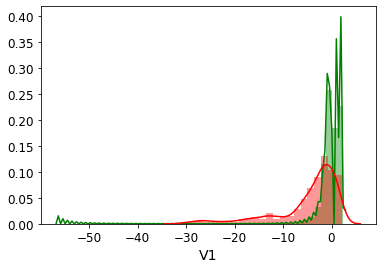

In [141]:
#Data Visualization for checking the distribution for Genuine cases & Fraud cases for each feature

sns.distplot(df[df['Class']==0]['V1'],color='g',label='Genuine class')
sns.distplot(df[df['Class']==1]['V1'],color='r',label='Fraud class')
ax.legend()
plt.show()

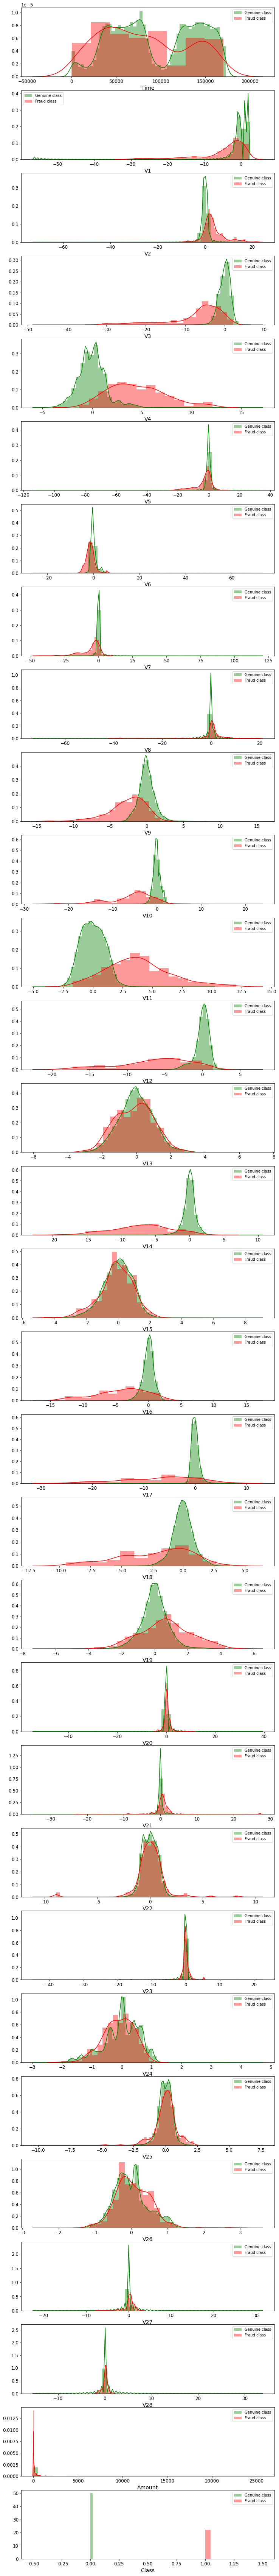

In [109]:
#distrubution of feature classes.
plt.figure(figsize=(12,31*4)) #size required for 31 features(figsize=(12,4) each)
gs = gridspec.GridSpec(31,1)  #defining grid for 31 feature.

for idx,col in enumerate(df.columns):
    ax = plt.subplot(gs[idx])
    sns.distplot(df[col][df['Class']==0],color='g',label='Genuine class')
    sns.distplot(df[col][df['Class']==1],color='r',label='Fraud class')
    ax.legend()
plt.show()

In [142]:
#We can see Normal Distribution of anomalous transactions (class = 1) is matching with 
#Normal Distribution of genuine transactions (class = 0) 
#for V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8' features. 
#It is better to delete these features as they may not be useful in finding anomalous records.

df.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'],axis=1,inplace=True)
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11',
       'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Amount', 'Class'],
      dtype='object')

In [143]:
#Time is not a good feature in predicting the anomalies, as it contains only record processing time
df.drop('Time',axis=1,inplace=True)
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Amount', 'Class'],
      dtype='object')

In [144]:
#Below features doesn't have the same distribution for both genuine & fraud records. 
#However distribution for fraud records is not unusual as well. So I'll delete these features as well, 
#since the features with unusual behavior for Fraud records will be most useful in anomaly detection algorithm.
df.drop(labels = ['V1','V2','V5','V6','V7','V21','Amount'], axis = 1, inplace=True)
df.columns


Index(['V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18',
       'V19', 'Class'],
      dtype='object')

In [145]:
#Visualization to understand the relationship between features and also data pattern using pair plot from seaborn
#g = sns.pairplot(df,hue="Class",diag_kind='kde')

In [191]:
#Method for selecting epsilon with best F1-score
def SelectThresholdByCV_Anomaly(probs,y):
    best_epsilon = 0
    best_f1 = 0
    f = 0
    precision =0
    recall=0
    best_recall = 0
    best_precision = 0
    
    epsilons = sorted(np.unique(probs))
    #print(epsilons)
    
    precisions=[]
    recalls=[]
    for epsilon in epsilons:
        predictions = (probs < epsilon)
        f = f1_score(y, predictions)
        precision = precision_score(y, predictions)
        recall = recall_score(y, predictions)
        #print("Theshold {0},Precision {1},Recall {2}".format(epsilon,precision,recall))
          
        if f > best_f1:
            best_f1 = f
            best_precision = precision
            best_recall = recall
            best_epsilon = epsilon
        
        precisions.append(precision)
        recalls.append(recall)

    #Precision-Recall Trade-off
    plt.plot(epsilons,precisions,label='Precision')
    plt.plot(epsilons,recalls,label='Recall')
    plt.xlabel("Epsilon")
    plt.title('Precision Recall Trade Off')
    plt.legend()
    plt.show()

    print ('Best F1 Score %f' %best_f1)
    print ('Best Precision Score %f' %best_precision)
    print ('Best Recall Score %f' %best_recall)
    print ('Best Epsilon', best_epsilon)


In [147]:
#Method for calculating Mu & co-variance
def estimateGaussian(data):
    mu = np.mean(data,axis=0)
    sigma = np.cov(data.T)
    return mu,sigma

In [148]:
#Method for implementing multivariate gaussian distribution function
def MultivariateGaussianDistribution(data,mu,sigma):
    p = multivariate_normal.pdf(data, mean=mu, cov=sigma)
    p_transformed = np.power(p,1/100)
    return p_transformed

In [149]:
genuine_data = df[df['Class']==0]
Fraud_data = df[df['Class']==1]

In [150]:
#Split Genuine records into train & test - 60:40 ratio
genuine_train,genuine_test = train_test_split(genuine_data,test_size=0.4,random_state=0)
print(genuine_train.shape)
print(genuine_test.shape)

(170589, 12)
(113726, 12)


In [151]:
#Split 40% of Genuine Test records into Cross Validation & Test again (50:50 ratio)
genuine_cv,genuine_test = train_test_split(genuine_test,test_size=0.5,random_state=0)
print(genuine_cv.shape)
print(genuine_test.shape)

(56863, 12)
(56863, 12)


In [152]:
#Split Fraud records into Cross Validation & Test (50:50 ratio)
fraud_cv,fraud_test = train_test_split(Fraud_data,test_size=0.5,random_state=0)


In [153]:
#Drop Y-label from Train data
train_data = genuine_train.drop('Class',axis=1)

In [154]:
print(train_data.shape)

(170589, 11)


In [155]:
#Cross validation data(combine both normal and fraud records)
cv_data = pd.concat([genuine_cv,fraud_cv])
cv_data_y = cv_data['Class']
cv_data.drop('Class',axis=1,inplace=True)
print(cv_data.shape)

(57109, 11)


In [194]:
#Test data(combine both normal and fraud records)
test_data = pd.concat([genuine_test,fraud_test])
test_data_y = test_data['Class']
test_data.drop(labels='Class',axis=1,inplace=True)
print(test_data.shape)

(57109, 11)


In [157]:
#StandardScaler – Feature scaling is not required since all the features are already standardized via PCA
#sc = StandardScaler()
#train_data = sc.fit_transform(train_data)
#cv_data = sc.transform(cv_data)
#test_data = sc.transform(test_data)

In [161]:
#Find out the parameters Mu and Covariance for passing to the probability density function
mu,sigma = estimateGaussian(train_data)

In [195]:
#Multivariate Gaussian distribution - This calculates the probability for each record.
p_train = MultivariateGaussianDistribution(train_data,mu,sigma)
print(p_train.mean())
print(p_train.std())
print(p_train.max())
print(p_train.min())

0.8619974422026009
0.04613876261260603
0.90419793993761
0.0


In [196]:
#Calculate the probabilities for cross validation and test records by passing the mean and co-variance matrix derived from train data
p_cv = MultivariateGaussianDistribution(cv_data,mu,sigma)
p_test = MultivariateGaussianDistribution(test_data,mu,sigma)

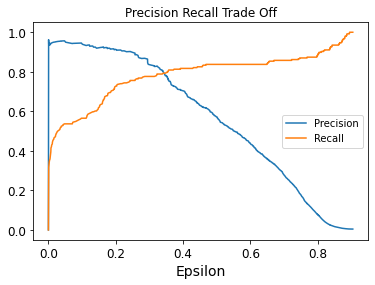

Best F1 Score 0.823009
Best Precision Score 0.902913
Best Recall Score 0.756098
Best Epsilon 0.2425112365126431


In [197]:
#Let us use cross validation to find the best threshold where the F1 -score is high
SelectThresholdByCV_Anomaly(p_cv,cv_data_y)

In [201]:
#CV data - Predictions
pred_cv= (p_cv < 0.2425)
print_Accuracy_Score(cv_data_y, pred_cv)

F1 Score:  0.8230088495575221
Precision score:  0.9029126213592233
Recall score:  0.7560975609756098


Text(0.5, 1.0, 'Normalized Confusion Matrix - Cross Validation')

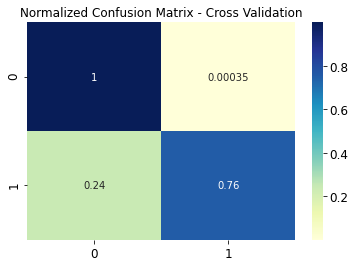

In [202]:
#Confusion matrix on CV
cnf_matrix = confusion_matrix(cv_data_y,pred_cv)
row_sum = cnf_matrix.sum(axis=1,keepdims=True)
cnf_matrix_norm =cnf_matrix / row_sum 
sns.heatmap(cnf_matrix_norm,cmap='YlGnBu',annot=True)
plt.title("Normalized Confusion Matrix - Cross Validation")